# Forecast with exponential smoothing

## Introduction

In this notebook, I approach forecasting with exponential smoothing (ES).  

Specifically, I use:

* Simple exponential smoothing (SES)
* Trend exponential smoothing (aka, Holt)
* Seasonal exponential smoothing (aka, Holt Winters)

I put my comments at the end.

## Set up

In [1]:
# # Eliminate some future warnings
# import warnings
# warnings.simplefilter(action='ignore', category='ConvergenceWarning')
# # Here's some oddness:  Importing warnings before statsmodels seems to cause prolems
# # And warnings causes some issues with other libraries

In [2]:
# Import global libraries
import numpy as np
import pandas as pd
from pandas.plotting import lag_plot

# Need converters for matplotlib to use dates otherwise I get warnings
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import matplotlib.pyplot as plt
import matplotlib.style as style

import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('paper')
sns.set_palette('muted')

In [3]:
# Import my global functions

import my_func
import importlib  # To allow reload while debugging .py files

In [4]:
# Import notebook-specific libraries

from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

## Load data

In [5]:
# Load testing and training data
test_sj = pd.read_pickle('../sb_cap2_nb-99_data/prep_test_sj.pickle')
train_sj = pd.read_pickle('../sb_cap2_nb-99_data/prep_train_sj.pickle')
test_iq = pd.read_pickle('../sb_cap2_nb-99_data/prep_test_iq.pickle')
train_iq = pd.read_pickle('../sb_cap2_nb-99_data/prep_train_iq.pickle')


# Load log-transformed testing and training data
log_test_sj = pd.read_pickle('../sb_cap2_nb-99_data/prep_log_test_sj.pickle')
log_train_sj = pd.read_pickle('../sb_cap2_nb-99_data/prep_log_train_sj.pickle')
log_test_iq = pd.read_pickle('../sb_cap2_nb-99_data/prep_log_test_iq.pickle')
log_train_iq = pd.read_pickle('../sb_cap2_nb-99_data/prep_log_train_iq.pickle')

# Load scores
score_df = pd.read_pickle('../sb_cap2_nb-99_data/scores_after_nbk_6.pickle')

## Variation 1 - Simple ES - optimized - San Juan

In [6]:
# Instantiate
es_simple_1_sj_model = SimpleExpSmoothing(np.asarray(train_sj))

In [7]:
# Fit
es_simple_1_sj_fit = es_simple_1_sj_model.fit()

In [8]:
# Summarize model
es_simple_1_sj_fit.summary()

Dep. Variable:,endog,No. Observations:,702
Model:,SimpleExpSmoothing,SSE,147939.000
Optimized:,True,AIC,3760.137
Trend:,None,BIC,3769.244
Seasonal:,None,AICC,3760.194
Seasonal Periods:,None,Date:,"Sun, 14 Jun 2020"
Box-Cox:,False,Time:,08:34:29
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
initial_level,4.0000000,l.0,True


In [9]:
# Forecast
forc_periods  = len(test_sj)
es_simple_1_sj_forc = es_simple_1_sj_fit.forecast(forc_periods)

In [10]:
# Clean
es_simple_1_sj_forc_df = my_func.combine_actual_and_forecast_into_single_df(test_sj, es_simple_1_sj_forc)

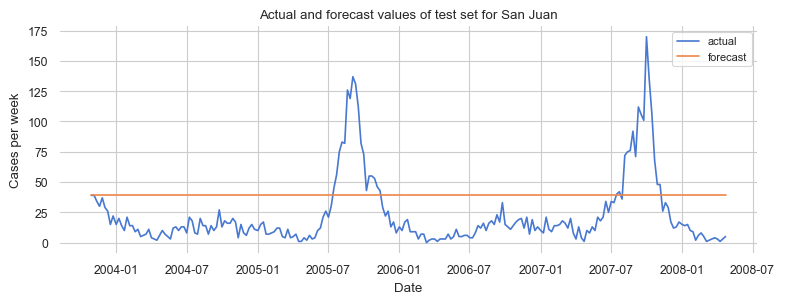

In [11]:
# Graph
my_func.graph_actual_and_forecast_from_test(es_simple_1_sj_forc_df, 'San Juan')

In [12]:
# Summarize forecast
es_simple_1_sj_forc_df['forecast'].describe().apply(lambda x: format(x, 'f'))

count    234.000000
mean      39.000000
std        0.000000
min       39.000000
25%       39.000000
50%       39.000000
75%       39.000000
max       39.000000
Name: forecast, dtype: object

In [13]:
# Validate - last value from training set
train_sj.tail(1)

,total_cases
week_start_date,
2003-10-22,39


In [14]:
# Score
my_func.score('exponential smoothing', 1, 'simpleES, a=1.0, optimized', 'san juan', 'test', 'none', 
              es_simple_1_sj_forc_df['actual'], es_simple_1_sj_forc_df['forecast'], score_df)

In [15]:
# Review scores
score_df.tail(1)

,approach,variation,summary,city,data,transform,rmse,mae
16,exponential smoothing,1,"simpleES, a=1.0, optimized",san juan,test,none,32.87343,28.713675


## Variation 2 - simple ES - manual with alpha at .2 - San Juan

In [16]:
# Instantiate
es_simple_2_sj_model = SimpleExpSmoothing(np.asarray(train_sj))

In [17]:
# Fit
es_simple_2_sj_fit = es_simple_2_sj_model.fit(smoothing_level=0.2,optimized=False)

In [18]:
# Summarize model
es_simple_2_sj_fit.summary()

Dep. Variable:,endog,No. Observations:,702
Model:,SimpleExpSmoothing,SSE,625592.705
Optimized:,False,AIC,4772.350
Trend:,None,BIC,4781.458
Seasonal:,None,AICC,4772.407
Seasonal Periods:,None,Date:,"Sun, 14 Jun 2020"
Box-Cox:,False,Time:,08:34:30
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.2000000,alpha,False
initial_level,4.0000000,l.0,False


In [19]:
# Forecast
forc_periods  = len(test_sj)
es_simple_2_sj_forc = es_simple_2_sj_fit.forecast(forc_periods)

In [20]:
# Clean
es_simple_2_sj_forc_df = my_func.combine_actual_and_forecast_into_single_df(test_sj, es_simple_2_sj_forc)

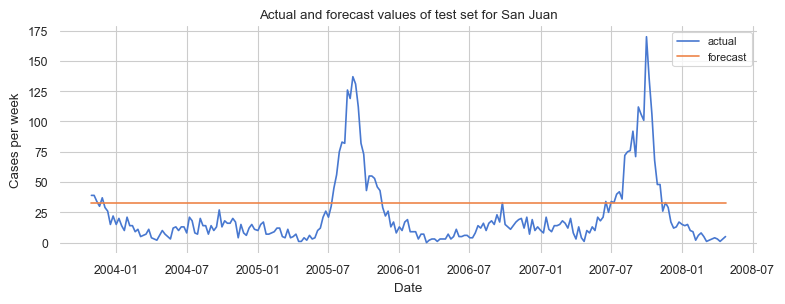

In [21]:
# Graph
my_func.graph_actual_and_forecast_from_test(es_simple_2_sj_forc_df, 'San Juan')

In [22]:
# Summarize forecast
es_simple_2_sj_forc_df['forecast'].describe().apply(lambda x: format(x, 'f'))

count    234.000000
mean      32.805425
std        0.000000
min       32.805425
25%       32.805425
50%       32.805425
75%       32.805425
max       32.805425
Name: forecast, dtype: object

In [23]:
# Score
my_func.score('exponential smoothing', 2, 'simpleES, a=.2', 'san juan', 'test', 'none', 
      es_simple_2_sj_forc_df['actual'], es_simple_2_sj_forc_df['forecast'], score_df)

In [24]:
# Review scores
score_df.tail(1)

,approach,variation,summary,city,data,transform,rmse,mae
17,exponential smoothing,2,"simpleES, a=.2",san juan,test,none,30.282828,24.523898


## Variation 3 - simple ES - manual with alpha at .8 - San Juan

In [25]:
# Instantiate
es_simple_3_sj_model = SimpleExpSmoothing(np.asarray(train_sj))

In [26]:
# Fit
es_simple_3_sj_fit = es_simple_3_sj_model.fit(smoothing_level=0.8,optimized=False)

In [27]:
# Summarize model
es_simple_3_sj_fit.summary()

Dep. Variable:,endog,No. Observations:,702
Model:,SimpleExpSmoothing,SSE,166624.406
Optimized:,False,AIC,3843.634
Trend:,None,BIC,3852.742
Seasonal:,None,AICC,3843.691
Seasonal Periods:,None,Date:,"Sun, 14 Jun 2020"
Box-Cox:,False,Time:,08:34:30
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.8000000,alpha,False
initial_level,4.0000000,l.0,False


In [28]:
# Forecast
forc_periods  = len(test_sj)
es_simple_3_sj_forc = es_simple_3_sj_fit.forecast(forc_periods)

In [29]:
# Clean
es_simple_3_sj_forc_df = my_func.combine_actual_and_forecast_into_single_df(test_sj, es_simple_3_sj_forc)

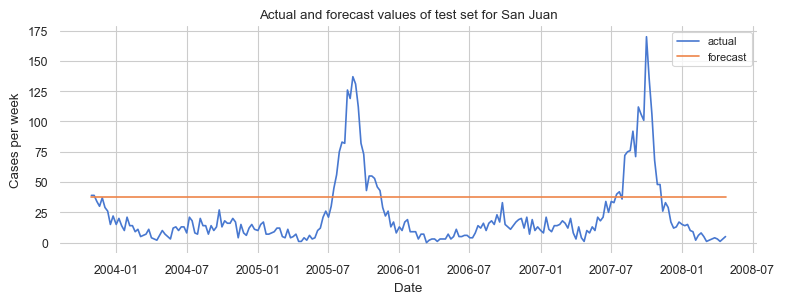

In [30]:
# Graph
my_func.graph_actual_and_forecast_from_test(es_simple_3_sj_forc_df, 'San Juan')

In [31]:
# Summarize forecast
es_simple_3_sj_forc_df['forecast'].describe().apply(lambda x: format(x, 'f'))

count    234.000000
mean      37.407067
std        0.000000
min       37.407067
25%       37.407067
50%       37.407067
75%       37.407067
max       37.407067
Name: forecast, dtype: object

In [32]:
# Score
my_func.score('exponential smoothing', 3, 'simpleES, a=.8', 'san juan', 'test', 'none', 
      es_simple_3_sj_forc_df['actual'], es_simple_3_sj_forc_df['forecast'], score_df)

In [33]:
# Review scores
score_df.tail(1)

,approach,variation,summary,city,data,transform,rmse,mae
18,exponential smoothing,3,"simpleES, a=.8",san juan,test,none,32.113226,27.610875


## Variation 4 - simple ES 4 - manual with alpha at .0 - San Juan

In [34]:
# Instantiate
es_simple_4_sj_model = SimpleExpSmoothing(np.asarray(train_sj))

In [35]:
# Fit
es_simple_4_sj_fit = es_simple_4_sj_model.fit(smoothing_level=0.0,optimized=False)

In [36]:
# Summarize model
es_simple_4_sj_fit.summary()

Dep. Variable:,endog,No. Observations:,702
Model:,SimpleExpSmoothing,SSE,3048538.000
Optimized:,False,AIC,5884.120
Trend:,None,BIC,5893.228
Seasonal:,None,AICC,5884.177
Seasonal Periods:,None,Date:,"Sun, 14 Jun 2020"
Box-Cox:,False,Time:,08:34:31
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.000000,alpha,False
initial_level,4.0000000,l.0,False


In [37]:
# Forecast
forc_periods  = len(test_sj)
es_simple_4_sj_forc = es_simple_4_sj_fit.forecast(forc_periods)

In [38]:
# Clean
es_simple_4_sj_forc_df = my_func.combine_actual_and_forecast_into_single_df(test_sj, es_simple_4_sj_forc)

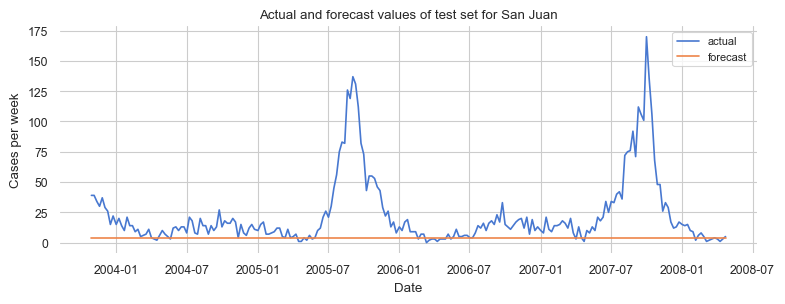

In [39]:
# Graph
my_func.graph_actual_and_forecast_from_test(es_simple_4_sj_forc_df, 'San Juan')

In [40]:
# Summarize forecast
es_simple_4_sj_forc_df['forecast'].describe().apply(lambda x: format(x, 'f'))

count    234.000000
mean       4.000000
std        0.000000
min        4.000000
25%        4.000000
50%        4.000000
75%        4.000000
max        4.000000
Name: forecast, dtype: object

In [41]:
# Vallidate:  First values of training set
train_sj.head(1)

,total_cases
week_start_date,
1990-04-30,4


In [42]:
# Validate:  Should be mean of training set
train_sj.mean()

total_cases    38.008547
dtype: float64

In [43]:
# # Score
# my_func.score('es_simple_4', 'manual, alpha=.0', 'san juan', 'test', 
#       es_simple_4_sj_forc_df['actual'], es_simple_4_sj_forc_df['forecast'], score_df)

In [44]:
# Score
my_func.score('exponential smoothing', 4, 'simpleES, a=0', 'san juan', 'test', 'none', 
      es_simple_4_sj_forc_df['actual'], es_simple_4_sj_forc_df['forecast'], score_df)

In [45]:
# Review scores
score_df.tail(1)

,approach,variation,summary,city,data,transform,rmse,mae
19,exponential smoothing,4,"simpleES, a=0",san juan,test,none,34.123644,19.089744


## Simple ES - all results - San Juan

In [46]:
score_df[(score_df['approach'] == 'exponential smoothing') &  (score_df['city'] == 'san juan')].sort_values('mae')

,approach,variation,summary,city,data,transform,rmse,mae
19,exponential smoothing,4,"simpleES, a=0",san juan,test,none,34.123644,19.089744
17,exponential smoothing,2,"simpleES, a=.2",san juan,test,none,30.282828,24.523898
18,exponential smoothing,3,"simpleES, a=.8",san juan,test,none,32.113226,27.610875
16,exponential smoothing,1,"simpleES, a=1.0, optimized",san juan,test,none,32.873430,28.713675


## Variation 5 - trend ES - optimized - San Juan

In [47]:
# Instantiate
es_trend_1_sj_model = Holt(np.asarray(train_sj))

In [48]:
# Fit
es_trend_1_sj_fit = es_trend_1_sj_model.fit()

In [49]:
# Summarize model
es_trend_1_sj_fit.summary()

Dep. Variable:,endog,No. Observations:,702
Model:,Holt,SSE,147937.971
Optimized:,True,AIC,3764.132
Trend:,Additive,BIC,3782.347
Seasonal:,None,AICC,3764.253
Seasonal Periods:,None,Date:,"Sun, 14 Jun 2020"
Box-Cox:,False,Time:,08:34:32
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
smoothing_slope,0.000000,beta,True


In [50]:
# Forecast
forc_periods  = len(test_sj)
es_trend_1_sj_forc = es_trend_1_sj_fit.forecast(forc_periods)

In [51]:
# Clean
es_trend_1_sj_forc_df = my_func.combine_actual_and_forecast_into_single_df(test_sj, es_trend_1_sj_forc)

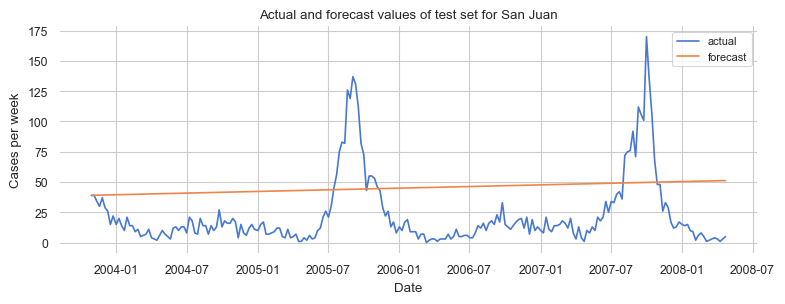

In [52]:
# Graph
my_func.graph_actual_and_forecast_from_test(es_trend_1_sj_forc_df, 'San Juan')

In [53]:
# Summarize forecast
es_trend_1_sj_forc_df['forecast'].describe().apply(lambda x: format(x, 'f'))

count    234.000000
mean      45.140599
std        3.537725
min       39.052260
25%       42.096430
50%       45.140599
75%       48.184769
max       51.228938
Name: forecast, dtype: object

In [54]:
# # Score
# my_func.score('es_trend_1', 'optimized, a=1, b=0', 'san juan', 'test', 
#       es_trend_1_sj_forc_df['actual'], es_trend_1_sj_forc_df['forecast'], score_df)

In [55]:
# Score
my_func.score('exponential smoothing', 5, 'trendES, a=1, b=0, optimized', 'san juan', 'test', 'none', 
              es_trend_1_sj_forc_df['actual'], es_trend_1_sj_forc_df['forecast'], score_df)

In [56]:
# Review scores
score_df.tail(1)

,approach,variation,summary,city,data,transform,rmse,mae
20,exponential smoothing,5,"trendES, a=1, b=0, optimized",san juan,test,none,36.072922,32.813863


## Variation 6 - Trend ES - manual with alpha=.8, beta=.2, dampen=False - San Juan

In [57]:
# Instantiate
es_trend_2_sj_model = Holt(np.asarray(train_sj), damped=False)

In [58]:
# Fit
es_trend_2_sj_fit = es_trend_2_sj_model.fit(smoothing_level=0.8, smoothing_slope=0.2)

In [59]:
# Summarize model
es_trend_2_sj_fit.summary()

Dep. Variable:,endog,No. Observations:,702
Model:,Holt,SSE,165663.335
Optimized:,True,AIC,3843.573
Trend:,Additive,BIC,3861.789
Seasonal:,None,AICC,3843.694
Seasonal Periods:,None,Date:,"Sun, 14 Jun 2020"
Box-Cox:,False,Time:,08:34:33
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.8000000,alpha,False
smoothing_slope,0.2000000,beta,False


In [60]:
# Forecast
forc_periods  = len(test_sj)
es_trend_2_sj_forc = es_trend_2_sj_fit.forecast(forc_periods)

In [61]:
# Clean
es_trend_2_sj_forc_df = my_func.combine_actual_and_forecast_into_single_df(test_sj, es_trend_2_sj_forc)

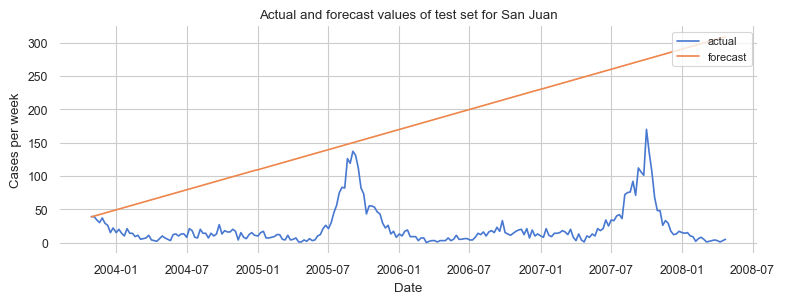

In [62]:
# Graph
my_func.graph_actual_and_forecast_from_test(es_trend_2_sj_forc_df, 'San Juan')

In [63]:
# Summarize forecast
es_trend_2_sj_forc_df['forecast'].describe().apply(lambda x: format(x, 'f'))

count    234.000000
mean     173.770970
std       78.534818
min       38.614473
25%      106.192722
50%      173.770970
75%      241.349219
max      308.927468
Name: forecast, dtype: object

In [64]:
# Score
my_func.score('exponential smoothing', 6, 'trendES, a=.8, b=.2', 'san juan', 'test', 'none', 
              es_trend_2_sj_forc_df['actual'], es_trend_2_sj_forc_df['forecast'], score_df)

In [65]:
# Review scores
score_df.tail(1)

,approach,variation,summary,city,data,transform,rmse,mae
21,exponential smoothing,6,"trendES, a=.8, b=.2",san juan,test,none,170.640349,151.077684


## Variation 7 - Trend ES - manual with alpha=.8, beta=.2, dampen=True - San Juan

In [66]:
# Instantiate
es_trend_3_sj_model = Holt(np.asarray(train_sj), damped=True)

In [67]:
# Fit
es_trend_3_sj_fit = es_trend_3_sj_model.fit(smoothing_level=0.8, smoothing_slope=0.2)

In [68]:
# Summarize model
es_trend_3_sj_fit.summary()

Dep. Variable:,endog,No. Observations:,702
Model:,Holt,SSE,151053.589
Optimized:,True,AIC,3780.762
Trend:,Additive,BIC,3803.532
Seasonal:,None,AICC,3780.924
Seasonal Periods:,None,Date:,"Sun, 14 Jun 2020"
Box-Cox:,False,Time:,08:34:33
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.8000000,alpha,False
smoothing_slope,0.2000000,beta,False


In [69]:
# Forecast
forc_periods  = len(test_sj)
es_trend_3_sj_forc = es_trend_3_sj_fit.forecast(forc_periods)

In [70]:
# Clean
es_trend_3_sj_forc_df = my_func.combine_actual_and_forecast_into_single_df(test_sj, es_trend_3_sj_forc)

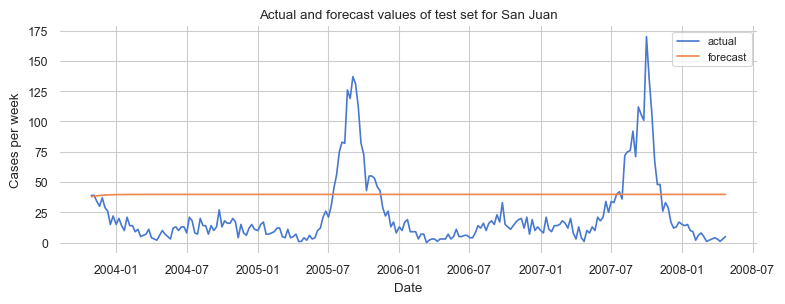

In [71]:
# Graph
my_func.graph_actual_and_forecast_from_test(es_trend_3_sj_forc_df, 'San Juan')

In [72]:
# Summarize forecast
es_trend_3_sj_forc_df['forecast'].describe().apply(lambda x: format(x, 'f'))

count    234.000000
mean      39.775730
std        0.197065
min       37.869759
25%       39.812232
50%       39.812233
75%       39.812233
max       39.812233
Name: forecast, dtype: object

In [73]:
# # Score
# my_func.score('es_trend_3', 'manual, a=.8, b=.2, dampen', 'san juan', 'test', 
#       es_trend_3_sj_forc_df['actual'], es_trend_3_sj_forc_df['forecast'], score_df)

In [74]:
# Score
my_func.score('exponential smoothing', 7, 'trendES, a=.8, b=.2, dampen', 'san juan', 'test', 'none', 
      es_trend_3_sj_forc_df['actual'], es_trend_3_sj_forc_df['forecast'], score_df)

In [75]:
# Review scores
score_df.tail(1)

,approach,variation,summary,city,data,transform,rmse,mae
22,exponential smoothing,7,"trendES, a=.8, b=.2, dampen",san juan,test,none,33.275935,29.268917


## Variation 8 - Trend ES - manual with alpha=.2, beta=.8, dampen=True - San Juan

In [76]:
# Instantiate
es_trend_4_sj_model = Holt(np.asarray(train_sj), damped=True)

In [77]:
# Fit
es_trend_4_sj_fit = es_trend_4_sj_model.fit(smoothing_level=0.2, smoothing_slope=0.8)

In [78]:
# Summarize model
es_trend_4_sj_fit.summary()

Dep. Variable:,endog,No. Observations:,702
Model:,Holt,SSE,625545.100
Optimized:,True,AIC,4778.297
Trend:,Additive,BIC,4801.066
Seasonal:,None,AICC,4778.458
Seasonal Periods:,None,Date:,"Sun, 14 Jun 2020"
Box-Cox:,False,Time:,08:34:34
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.2000000,alpha,False
smoothing_slope,0.8000000,beta,False


In [79]:
# Forecast
forc_periods  = len(test_sj)
es_trend_4_sj_forc = es_trend_4_sj_fit.forecast(forc_periods)

In [80]:
# Clean
es_trend_4_sj_forc_df = my_func.combine_actual_and_forecast_into_single_df(test_sj, es_trend_4_sj_forc)

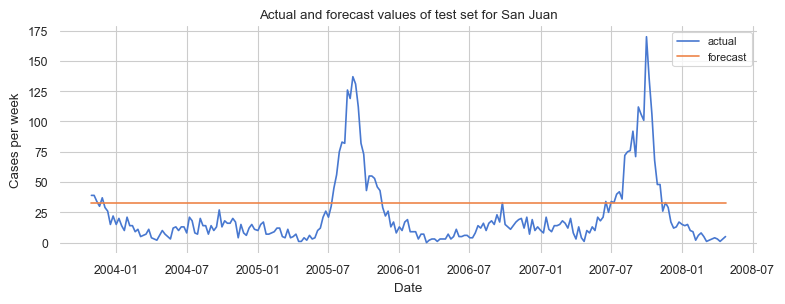

In [81]:
# Graph
my_func.graph_actual_and_forecast_from_test(es_trend_4_sj_forc_df, 'San Juan')

In [82]:
# Summarize forecast
es_trend_4_sj_forc_df['forecast'].describe().apply(lambda x: format(x, 'f'))

count    234.000000
mean      32.805903
std        0.000000
min       32.805903
25%       32.805903
50%       32.805903
75%       32.805903
max       32.805903
Name: forecast, dtype: object

In [83]:
# Score
my_func.score('exponential smoothing', 8, 'trendES, a=.2, b=.8, dampen', 'san juan', 'test', 'none', 
      es_trend_4_sj_forc_df['actual'], es_trend_4_sj_forc_df['forecast'], score_df)

In [84]:
# Review scores
score_df.tail(1)

,approach,variation,summary,city,data,transform,rmse,mae
23,exponential smoothing,8,"trendES, a=.2, b=.8, dampen",san juan,test,none,30.282987,24.524196


## Trend ES - all results - San Juan

In [85]:
score_df[(score_df['summary'].str.contains('trendES')) &  (score_df['city'] == 'san juan')].sort_values('mae')

,approach,variation,summary,city,data,transform,rmse,mae
23,exponential smoothing,8,"trendES, a=.2, b=.8, dampen",san juan,test,none,30.282987,24.524196
22,exponential smoothing,7,"trendES, a=.8, b=.2, dampen",san juan,test,none,33.275935,29.268917
20,exponential smoothing,5,"trendES, a=1, b=0, optimized",san juan,test,none,36.072922,32.813863
21,exponential smoothing,6,"trendES, a=.8, b=.2",san juan,test,none,170.640349,151.077684


## Variation 9 - seasonal ES - optimized - San Juan

In [86]:
# Instantiate
es_hw1_sj_model = ExponentialSmoothing(np.asarray(train_sj['total_cases']), trend='add', damped=True, 
                                       seasonal='add', seasonal_periods=52)

In [87]:
# Fit
es_hw1_sj_fit = es_hw1_sj_model.fit()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [88]:
# Summarize model
es_hw1_sj_fit.summary()

Dep. Variable:,endog,No. Observations:,702
Model:,ExponentialSmoothing,SSE,141993.757
Optimized:,True,AIC,3841.343
Trend:,Additive,BIC,4100.917
Seasonal:,Additive,AICC,3852.371
Seasonal Periods:,52,Date:,"Sun, 14 Jun 2020"
Box-Cox:,False,Time:,08:34:36
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.8947368,alpha,True
smoothing_slope,0.8026362,beta,True


In [89]:
# Forecast
forc_periods  = len(test_sj)
es_hw1_sj_fit_forc = es_hw1_sj_fit.forecast(forc_periods)

In [90]:
# Clean
es_hw1_sj_fit_forc_df = my_func.combine_actual_and_forecast_into_single_df(test_sj, es_hw1_sj_fit_forc)

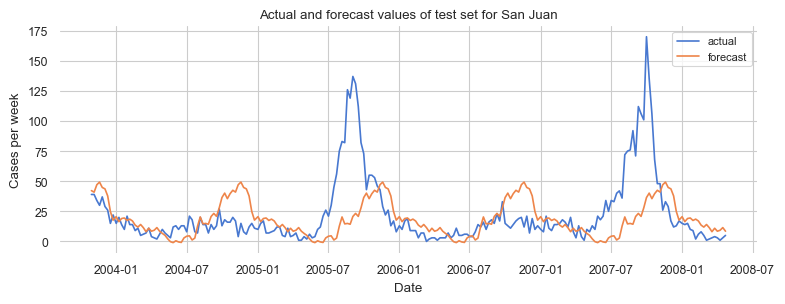

In [91]:
# Graph
my_func.graph_actual_and_forecast_from_test(es_hw1_sj_fit_forc_df, 'San Juan')

In [92]:
# Summarize forecast
es_hw1_sj_fit_forc_df['forecast'].describe().apply(lambda x: format(x, 'f'))

count    234.000000
mean      18.468114
std       14.245529
min       -0.981612
25%        8.492040
50%       14.955626
75%       24.859400
max       49.284076
Name: forecast, dtype: object

In [93]:
# # Score
# my_func.score('es_szn_1', 'optimized', 'san juan', 'test', 
#       es_hw1_sj_fit_forc_df['actual'], es_hw1_sj_fit_forc_df['forecast'], score_df)

In [94]:
# Score
my_func.score('exponential smoothing', 9, 'seasonalES, a=.9, b=.8, g=.1, optimized', 'san juan', 'test', 'none',
      es_hw1_sj_fit_forc_df['actual'], es_hw1_sj_fit_forc_df['forecast'], score_df)

In [95]:
# Review scores
score_df.tail(1)

,approach,variation,summary,city,data,transform,rmse,mae
24,exponential smoothing,9,"seasonalES, a=.9, b=.8, g=.1, optimized",san juan,test,none,28.602235,17.138453


## Variation 10 - Seasonal ES - optimized - log(x+1) - San Juan

In [96]:
# Instantiate
es_hw_1_sj_model_log = ExponentialSmoothing(np.asarray(log_train_sj['total_cases']), trend='add', damped=True, 
                                          seasonal='add', seasonal_periods=52)

In [97]:
# Fit
es_hw_1_sj_fit_log = es_hw_1_sj_model_log.fit()

In [98]:
# Summarize model
es_hw_1_sj_fit_log.summary()

Dep. Variable:,endog,No. Observations:,702
Model:,ExponentialSmoothing,SSE,76.228
Optimized:,True,AIC,-1444.583
Trend:,Additive,BIC,-1185.009
Seasonal:,Additive,AICC,-1433.555
Seasonal Periods:,52,Date:,"Sun, 14 Jun 2020"
Box-Cox:,False,Time:,08:34:38
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.4718057,alpha,True
smoothing_slope,0.0509979,beta,True


In [99]:
# Forecast
forc_periods  = len(log_test_sj)
es_hw_1_sj_fit_forc_log = es_hw_1_sj_fit_log.forecast(forc_periods)

In [100]:
# Clean
es_hw_1_sj_fit_forc_df_log = my_func.combine_actual_and_forecast_into_single_df(log_test_sj, es_hw_1_sj_fit_forc_log)

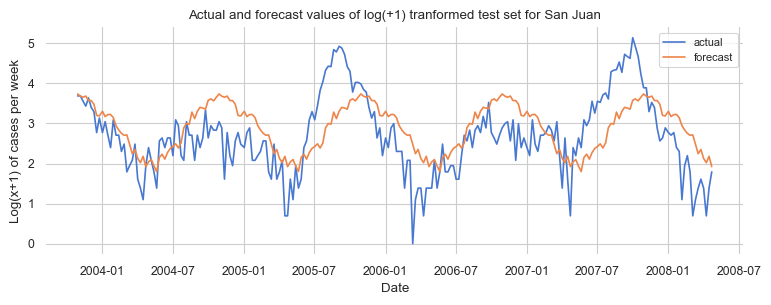

In [101]:
# Graph
my_func.graph_actual_and_forecast_from_test_for_log_data(es_hw_1_sj_fit_forc_df_log, 'San Juan')

In [102]:
def tranform_back_from_log_x_plus_1(df):
    """Returns a new data frames that's transforms both actual and forecast back from log(x+1)"""
    
    forc_df = df.copy()
    forc_df['expm1_act'] = np.expm1(forc_df['actual'])
    forc_df['expm1_forc'] = np.expm1(forc_df['forecast'])
    forc_df.drop(['actual', 'forecast'], axis=1, inplace=True)
    forc_df.rename(columns = {'expm1_act':'actual', 'expm1_forc':'forecast'}, inplace = True)
    
    return forc_df

In [103]:
# Tranform back from log(x_1)
es_hw_1_sj_fit_forc_df_log_back = tranform_back_from_log_x_plus_1(es_hw_1_sj_fit_forc_df_log)

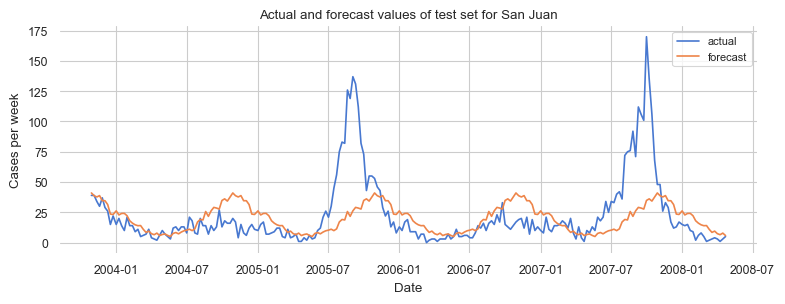

In [104]:
# Graph
my_func.graph_actual_and_forecast_from_test(es_hw_1_sj_fit_forc_df_log_back, 'San Juan')

In [105]:
# Summarize forecast after tranformed back
es_hw_1_sj_fit_forc_df_log_back['forecast'].describe().apply(lambda x: format(x, 'f'))

count    234.000000
mean      19.856228
std       11.092195
min        5.051296
25%        9.489633
50%       18.723649
75%       28.333739
max       41.003163
Name: forecast, dtype: object

In [106]:
# # Score
# my_func.score('es_szn_log', 'optimized, log data', 'san juan', 'test', 
#       es_hw_1_sj_fit_forc_df_log_back['actual'], es_hw_1_sj_fit_forc_df_log_back['forecast'], score_df)

In [107]:
# Score
my_func.score('exponential smoothing', 10, 'seasonalES, a=.5, b=.1, g=0, optimized', 'san juan', 'test', 'lox(x+1)',
              es_hw_1_sj_fit_forc_df_log_back['actual'], es_hw_1_sj_fit_forc_df_log_back['forecast'], score_df)

In [108]:
# Review scores
score_df.tail(1)

,approach,variation,summary,city,data,transform,rmse,mae
25,exponential smoothing,10,"seasonalES, a=.5, b=.1, g=0, optimized",san juan,test,lox(x+1),26.54395,15.536584


## Seasonal ES - all results - San Juan

In [109]:
score_df[(score_df['summary'].str.contains("seasonalES")) &  (score_df['city'] == 'san juan')].sort_values('mae')

,approach,variation,summary,city,data,transform,rmse,mae
25,exponential smoothing,10,"seasonalES, a=.5, b=.1, g=0, optimized",san juan,test,lox(x+1),26.543950,15.536584
24,exponential smoothing,9,"seasonalES, a=.9, b=.8, g=.1, optimized",san juan,test,none,28.602235,17.138453


## Variation 11 - seasonal ES - optimized - Iquitos

In [110]:
# Instantiate
es_hw1_iq_model = ExponentialSmoothing(np.asarray(train_iq['total_cases']), trend='add', damped=True, 
                                       seasonal='add', seasonal_periods=52)

In [111]:
# Fit
es_hw1_iq_fit = es_hw1_iq_model.fit()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [112]:
# Summarize model
es_hw1_iq_fit.summary()

Dep. Variable:,endog,No. Observations:,331
Model:,ExponentialSmoothing,SSE,17756.676
Optimized:,True,AIC,1432.174
Trend:,Additive,BIC,1648.895
Seasonal:,Additive,AICC,1458.299
Seasonal Periods:,52,Date:,"Sun, 14 Jun 2020"
Box-Cox:,False,Time:,08:34:41
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.5895631,alpha,True
smoothing_slope,5.9432e-05,beta,True


In [113]:
# Forecast
forc_periods  = len(test_iq)
es_hw1_iq_fit_forc = es_hw1_iq_fit.forecast(forc_periods)

In [114]:
# Clean
es_hw1_iq_fit_forc_df = my_func.combine_actual_and_forecast_into_single_df(test_iq, es_hw1_iq_fit_forc)

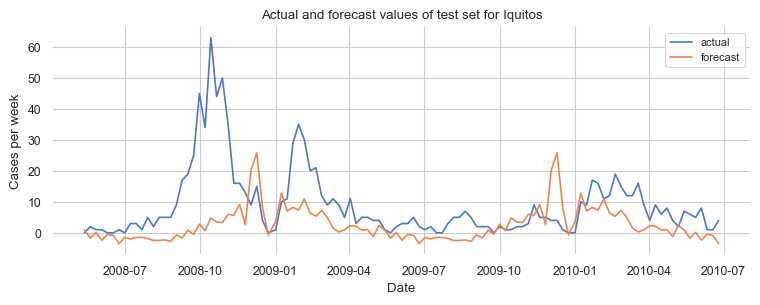

In [115]:
# Graph
my_func.graph_actual_and_forecast_from_test(es_hw1_iq_fit_forc_df, 'Iquitos')

In [116]:
# Summarize forecast
es_hw1_iq_fit_forc_df['forecast'].describe().apply(lambda x: format(x, 'f'))

count    111.000000
mean       2.601690
std        5.548970
min       -3.484238
25%       -1.470048
50%        0.940810
75%        5.171682
max       25.796025
Name: forecast, dtype: object

In [117]:
# # Score
# my_func.score('es_szn_3', 'optimized', 'iquitos', 'test', 
#       es_hw1_iq_fit_forc_df['actual'], es_hw1_iq_fit_forc_df['forecast'], score_df)

In [118]:
# Score
my_func.score('exponential smoothing', 11, 'seasonalES, a=.6, b=0, g=0, optimized', 'iquitos', 'test', 'none',
              es_hw1_iq_fit_forc_df['actual'], es_hw1_iq_fit_forc_df['forecast'], score_df)

In [119]:
# Review scores
score_df.tail(1)

,approach,variation,summary,city,data,transform,rmse,mae
26,exponential smoothing,11,"seasonalES, a=.6, b=0, g=0, optimized",iquitos,test,none,12.825165,8.1474


## Variation 12 - Seasonal ES - optimized - log(x+1) - Iquitos

In [120]:
# Instantiate
es_hw_1_iq_model_log = ExponentialSmoothing(np.asarray(log_train_iq['total_cases']), trend='add', damped=True, 
                                          seasonal='add', seasonal_periods=52)

In [121]:
# Fit
es_hw_1_iq_fit_log = es_hw_1_iq_model_log.fit()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [122]:
# Summarize model
es_hw_1_iq_fit_log.summary()

Dep. Variable:,endog,No. Observations:,331
Model:,ExponentialSmoothing,SSE,133.463
Optimized:,True,AIC,-186.646
Trend:,Additive,BIC,30.075
Seasonal:,Additive,AICC,-160.521
Seasonal Periods:,52,Date:,"Sun, 14 Jun 2020"
Box-Cox:,False,Time:,08:34:43
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.4210526,alpha,True
smoothing_slope,0.4210526,beta,True


In [123]:
# Forecast
forc_periods  = len(log_test_iq)
es_hw_1_iq_fit_forc_log = es_hw_1_iq_fit_log.forecast(forc_periods)

In [124]:
# Clean
es_hw_1_iq_fit_forc_df_log = my_func.combine_actual_and_forecast_into_single_df(log_test_iq, es_hw_1_iq_fit_forc_log)

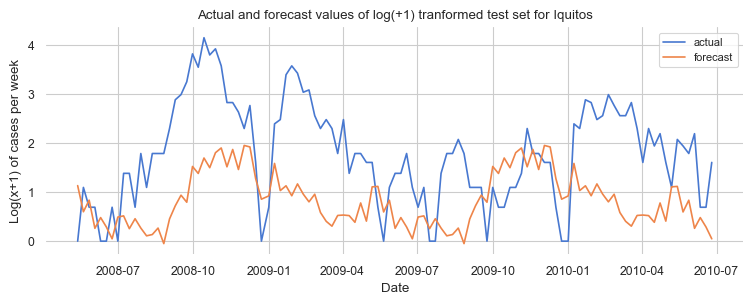

In [125]:
# Graph
my_func.graph_actual_and_forecast_from_test_for_log_data(es_hw_1_iq_fit_forc_df_log, 'Iquitos')

In [126]:
# Tranform back from log(x_1) before scoring
es_hw_1_iq_fit_forc_df_log_back = tranform_back_from_log_x_plus_1(es_hw_1_iq_fit_forc_df_log)

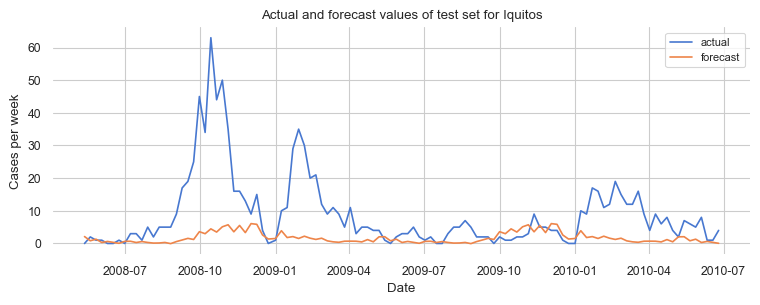

In [127]:
# Graph
my_func.graph_actual_and_forecast_from_test(es_hw_1_iq_fit_forc_df_log_back, 'Iquitos')

In [128]:
# Summarize forecast after tranformed back
es_hw_1_iq_fit_forc_df_log_back['forecast'].describe().apply(lambda x: format(x, 'f'))

count    111.000000
mean       1.708578
std        1.653285
min       -0.049246
25%        0.505548
50%        1.215590
75%        2.166675
max        6.075992
Name: forecast, dtype: object

In [129]:
# # Score
# my_func.score('es_szn_log', 'optimized, log data', 'iquitos', 'test', 
#       es_hw_1_iq_fit_forc_df_log_back['actual'], es_hw_1_iq_fit_forc_df_log_back['forecast'], score_df)

In [130]:
# Score
my_func.score('exponential smoothing', 12, 'seasonalES, a=.4, b=.4, g=.2, optimized', 'iquitos', 'test', 'log(x+1)',
              es_hw_1_iq_fit_forc_df_log_back['actual'], es_hw_1_iq_fit_forc_df_log_back['forecast'], score_df)

In [131]:
# Review scores
score_df.tail(1)

,approach,variation,summary,city,data,transform,rmse,mae
27,exponential smoothing,12,"seasonalES, a=.4, b=.4, g=.2, optimized",iquitos,test,log(x+1),12.989226,7.853348


## Seasonal ES - all results - Iquitos

In [132]:
score_df[(score_df['summary'].str.contains('seasonalES')) &  (score_df['city'] == 'iquitos')].sort_values('mae')

,approach,variation,summary,city,data,transform,rmse,mae
27,exponential smoothing,12,"seasonalES, a=.4, b=.4, g=.2, optimized",iquitos,test,log(x+1),12.989226,7.853348
26,exponential smoothing,11,"seasonalES, a=.6, b=0, g=0, optimized",iquitos,test,none,12.825165,8.147400


## Summarize - all scores - all notebooks

In [133]:
# score_df.sort_values(by=['data_set', 'mae'], ascending=True).sort_values(by=['city'], ascending=False)
summary = score_df[score_df['data'] == 'test']
summary.sort_values(by=['city', 'mae'], ascending=[False, True])

,approach,variation,summary,city,data,transform,rmse,mae
25,exponential smoothing,10,"seasonalES, a=.5, b=.1, g=0, optimized",san juan,test,lox(x+1),26.543950,15.536584
13,ARIMA,2,"SARIMAX (2, 1, 2) x (2, 0, 1, 52)",san juan,test,log(x+1),26.606072,15.849436
24,exponential smoothing,9,"seasonalES, a=.9, b=.8, g=.1, optimized",san juan,test,none,28.602235,17.138453
12,ARIMA,1,"SARMIA (3, 1, 2) x (0, 0, 0, 52)",san juan,test,none,29.482909,18.707521
19,exponential smoothing,4,"simpleES, a=0",san juan,test,none,34.123644,19.089744
4,naive,3,seasonal naive method,san juan,test,none,35.954565,21.337607
17,exponential smoothing,2,"simpleES, a=.2",san juan,test,none,30.282828,24.523898
23,exponential smoothing,8,"trendES, a=.2, b=.8, dampen",san juan,test,none,30.282987,24.524196
18,exponential smoothing,3,"simpleES, a=.8",san juan,test,none,32.113226,27.610875
0,naive,1,average method,san juan,test,none,32.393166,28.027285


## Save scores

In [134]:
score_df.to_pickle('../sb_cap2_nb-99_data/scores_after_nbk_7.pickle')

## Commentary

In this notebook, I use another "classic" approach to time-series forecasting--exponential smoothing (ES).  ES is a family of methods where forecasts are weighted averages of past observations with the weights decaying exponentially as the observations get older.  Of the ES's many methods, I focus on simple, trend and seasonal approaches.  Also, I explore the models with the San Juan data and apply the best method to the Iquitos data.

**Simple exponential smoothing**

* Simple exponential smoothing (SES) is the original ES method.  Typically, it is used for data with neither trend nor seasonality but only a 'level.'
* SES has one parameter--alpha.  Alpha allocates weight between past and current observations.  For example, when alpha is 0, SES weights each observation equally, and the forecast is the mean (which is the same as the average method).  When alpha is 1, SES allocates all weight to the last observations (which is the same the naive method).
* With my data, the lower the alpha the better the score.
* However, I am getting some odd results which warrant more investigation.  For example, at an alpha of 0, my forecast value is the first observation of the training set, not the mean of the training set as expected.  Also, optimized SES selects an alpha at 1, which has a worse MAE but the best AIC of the SES models.
* Nevertheless, my data has strong seasonality, which makes SES not all that applicable.  So, I put these investigations into the backlog.

**Trend exponential smoothing**

* Trend exponential smoothing, which is also called the Holt method or double ES, extends ES to account for a trend.  Alpha is the level-based smoothing parameter, which ranges between 0 and 1, like in SES.  Beta is the trend-based smoothing parameter, which also ranges between 0 and 1.
* There is a third parameter--dampening.  Trend ES forecasts with constantly increasing or decreasing trends.  These have been show empirically to over- and under- forecast, especially with long-term forecasts, like the ones that I am performing.  The dampening parameters "flatten" these future trends.
* Trend ES has two variations--additive and multiplicative.  Additive is appropriate when the variance is more constant and does not change with time.  Multiplicative is more appropriate when variance changes as the time changes.  For this data with a weak trend, an additive trend is more appropriate.
* One optimized model is an additive model with alpha of 1, beta of 0 and no dampening.  As I read this model, it takes the most recent values and gives them the smallest of positive trend.  To my eye, this does capture the slight trend in the test set. 
* By manually tuning alpha and beta, I improve the RMSE and MAE scores, but I do not "beat" the later models.

**Seasonal exponential smoothing**

* Seasonable exponential smoothing, also called the Holt-Winters’ method or triple ES, adds seasonality.  In addition to alpha and beta, there is a seasonal smoothing parameter, gamma, which ranges between 0 and 1.  Like the trend model, the seasonality can be additive or multiplicative.  Also, the seasonal model needs to be supplied the season's period (aka, weekly, monthly, yearly).
* The optimized model on log-transformed data produces the best results to date for San Juan.